<a href="https://colab.research.google.com/github/yeomko22/data_analytics_camp_2023_share/blob/main/week19_deeplearning_nlp/ch19_6_seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch19_6 seq2seq

Ïù¥Ï†Ñ Ï±ïÌÑ∞ÏóêÏÑú LSTMÍ≥º GRUÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞ÑÎã®Ìïú Î¨∏Ïû• Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥ÏïòÏäµÎãàÎã§. Ïù¥Î≤à Ï±ïÌÑ∞ÏóêÏÑúÎäî Ïù¥ RNN Î™®Îç∏Îì§ÏùÑ Í∞ÄÏßÄÍ≥† seq2seqÎùº Î∂àÎ¶¨Îäî Íµ¨Ï°∞Î°ú Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÏó¨ Î≤àÏó≠ÏùÑ ÏàòÌñâÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

ÌòÑÏû¨ ÏÇ¨Ïö©ÌïòÎäî LLM Î™®Îç∏Îì§ÏùÑ Íµ¨ÏÑ±ÌïòÎäî Í∏∞Ïà†Îì§Ïù¥ Î™®Îëê Î≤àÏó≠ ÌÖåÏä§ÌÅ¨ÏóêÏÑú Î™®Ìã∞Î∏åÎ•º ÏñªÏóàÏúºÎØÄÎ°ú, Í∞ÑÎã®Ìûà Í∏∞Í≥Ñ Î≤àÏó≠ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºúÎ≥¥Î©¥ÏÑú ÏõêÎ¶¨Î•º Ïù¥Ìï¥Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

## ÏÇ¨Ï†Ñ ÏûëÏóÖ

### ÎîîÎ∞îÏù¥Ïä§ ÏÑ§Ï†ï

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Îç∞Ïù¥ÌÑ∞ ÏÖã Ï§ÄÎπÑ

Î≤àÏó≠ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑúÎäî ÏõêÎ¨∏Í≥º Î≤àÏó≠Î¨∏Ïù¥ ÏåçÏúºÎ°ú ÏßùÏßÄÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ ÏÖãÏù¥ ÌïÑÏöîÌï©ÎãàÎã§. Ïù¥Î•º parallel corpus(Î≥ëÎ†¨ ÏΩîÌçºÏä§)ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§. ÎØ∏Î¶¨ Ï†ÑÏ≤òÎ¶¨ Ìï¥ÎÜìÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ Î∂àÎü¨Ïò§Í≤†ÏäµÎãàÎã§.

In [4]:
import pandas as pd

train_df = pd.read_csv("./drive/MyDrive/dscamp_2023/translation_train.csv")
val_df = pd.read_csv("./drive/MyDrive/dscamp_2023/translation_val.csv")
test_df = pd.read_csv("./drive/MyDrive/dscamp_2023/translation_test.csv")

In [5]:
train_df

kor  \
0                             msleeÍ∞Ä Î∂ÄÏû¨Ï§ëÏù¥ÏÖîÏÑú, ÎãπÏã†ÏóêÍ≤å Ïó∞ÎùΩÎìúÎ¶ΩÎãàÎã§.   
1       ÏïÑÎûò ÎÇ¥Ïö©ÏúºÎ°ú ÌÖåÏä§Ìä∏ Ìò∏ÌÖî ÏßÄÎèÑÌôîÍ∞Ä ÎêòÏóàÎã§Í≥† ÌñàÍ≥†, ssoÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÏûÖ ÌéòÏù¥ÏßÄÏóê...   
2                                  Ï†úÏù∏Ïù¥ Î∞©Ïóê Îì§Ïñ¥Ïò§Î©¥ Î∂ÑÏúÑÍ∏∞Í∞Ä Î∞îÎÄùÎãàÎã§.   
3                               ÎÇòÎäî ÎÑ§Í∞Ä Í∑∏ Ï±ÑÌåÖ Ïï±ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ïã´Ïñ¥.   
4                        Ï∞ΩÏùòÏ†ÅÏù∏ ÏïÑÏù¥ÎîîÏñ¥Î•º ÌÜµÌï¥ ÏßÄÏó≠Í≥º Ìï®Íªò Î∞úÏ†ÑÌïòÎäî ÌöåÏÇ¨ÏûÖÎãàÎã§.   
...                                                   ...   
399995      Í∑∏Î†áÍµ∞Ïöî. Í∑∏Îü∞Îç∞ Í∑∏ÎÇ† Ïò§ÌõÑÏóê ÏÑúÏö∏ Îñ†ÎÇòÏÑú Îã§Î•∏ ÎÇ†Î°ú ÏùºÏ†ïÏùÑ Ïû°ÏùÑ ÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§.   
399996                             Í∑∏Í±¥ ÎÇòÏóêÍ≤å Ïò® Ìé∏ÏßÄÎ•º Î∞õÍ∏∞ ÏúÑÌï¥ÏÑúÏòàÏöî.   
399997     ÎÇ¥ ÏÉùÍ∞ÅÏóêÎäî silicone volume Í∞íÏùÑ Ï∏°Ï†ïÌïòÎäî ÌôîÎ©¥Îßå ÏûàÏúºÎ©¥ Îê† Í≤É Í∞ôÏïÑ.   
399998                              ÎãπÏã†ÏùÄ ÎÇòÎ•º Ï∂©Î∂ÑÌûà ÏïàÏã¨ ÏãúÏºú Ï§¨Ïñ¥Ïöî.   
399999                      Ï†Ñ ÏÑ∏Í≥Ñ 5,000Îßå Î™Ö Ïù¥ÏÉÅÏùò Í∞ÄÏûÖÏûêÍ∞Ä Ïù¥Ïö©Ìï©ÎãàÎã§.   

                                                      eng  
0               since ms.lee is absence, i contacted you.  
1       it says that test hotel mapping has been done ...  
2       the atmosphere changes when jane enters the room.  
3                  i dislike you using that chatting app.  
4       it's a company growing with the community thro...  
...                                                   ...  
399995  i see. but i cant schedule another date since ...  
399996     it is getting the letter which was sent to me.  
399997  in my opinion, all we need is a screen for mea...  
399998                            you relieved me enough.  
399999         there are over 50 million users worldwide.  

[400000 rows x 2 columns]

In [6]:
val_df

kor  \
0                                      Ïò§Îäò ÎãπÏã†Ïù¥ ÏôÄÏ£ºÏÖîÏÑú Í∞êÏÇ¨Ìï¥Ïöî.   
1                 Ï†úÍ∞Ä Îçî Ï†ÄÎ†¥ÌïòÍ≤å Ï§Ñ Ïàò ÏóÜÎäî ÎåÄÏã† ÏñëÎßê Ìïú Ïº§Î†àÎ•º ÏÑúÎπÑÏä§Î°ú Ï§ÑÍ≤åÏöî.   
2                        ÏÇ¨Ïö©Ìïú ÏÉòÌîåÏùÄ Ï§ëÍµ≠Ïóê ÏûàÎäî Í≥µÏû•ÏóêÏÑú Ï†úÍ≥µÎêú Í≤ÉÏù¥ ÏïÑÎãàÎã§.   
3           ÏÑ∏Ïïà ÌõÑ Ïä§ÌÇ® ÏÇ¨Ïö© Ï†Ñ, Ïù¥ Ï†úÌíàÏùÑ Ï†ÅÎãπÎüâÏùÑ ÎçúÏñ¥ ÏñºÍµ¥Ïóê Î∂ÄÎìúÎüΩÍ≤å Ìé¥ Î∞îÎ¶ÖÎãàÎã§.   
4                             Ìïú Î≤àÎèÑ ÏûäÏùÄ Ï†ÅÏù¥ ÏóÜÏóàÏ£†, Ïö∞Î¶¨ ÎßàÏßÄÎßâ ÏàúÍ∞Ñ.   
...                                                  ...   
98995             Ïó¨Í∏∞Ïùò ÏßÄÎ¨∏ÏóêÏÑúÎäî ÏÑúÏñëÏãùÏùò Ïò∑Ïù¥ Ïö¥ÎèôÌïòÍ∏∞Ïóê ÎçîÏö± Ï†ÅÌï©ÌïòÎã§Í≥† Ïñ∏Í∏âÌï¥Ïöî.   
98996        Ïö∞Î¶¨Ïùò ÏßÄÏõê Îã¥ÎãπÏûêÍ∞Ä ÎãπÏã†Ïùò ÏöîÏ≤≠ÏùÑ Í≤ÄÌÜ†Ìïú ÌõÑ Í∞úÏù∏Ï†ÅÏúºÎ°ú Ïó∞ÎùΩÏùÑ Ï§Ñ Í≤ÉÏûÖÎãàÎã§.   
98997     Ïù¥ ÎπÑÏ¶àÎãàÏä§Í∞Ä ÏÑ±ÏÇ¨Îê† Ïàò ÏûàÎèÑÎ°ù Ï¢Ä Îçî Ï†ÅÍ∑πÏ†ÅÏúºÎ°ú g4sÎ•º Ìë∏Ïâ¨ Ìï¥Ï£ºÍ∏∞Î•º Î∞îÎûçÎãàÎã§.   
98998                                   Î∞§Ïóê Í∞ÄÎäî Îç∞ ÏñºÎßàÎÇò Í±∏Î†§Ïöî?   
98999  Ï±ïÌÑ∞ Ï†úÎ™©Ïùò ÏßàÎ¨∏Ïóê ÎπàÏ†ïÎåÄÎäî ÎåÄÎãµÏùÑ ÌïòÎ†§Îäî ÎãπÏã† ÏûêÏã†ÏùÑ Î∞úÍ≤¨ÌïòÎäî Í≤ÉÎèÑ ÎÜÄÎûçÏßÄ ÏïäÏùÑ ...   

                                                     eng  
0                       i'm very glad you've come today.  
1      i cannot give you a discounted price but i wil...  
2      the sample used was not provided by the factor...  
3      after washing the face and before using a tone...  
4                 i really never forgot our last moment.  
...                                                  ...  
98995  the text here mentions that westernstyle cloth...  
98996  a support manager will be reviewing your reque...  
98997  please push g4s a little more so that this bus...  
98998       how long does it take to get there at night?  
98999  it would not be surprising if you find yoursel...  

[99000 rows x 2 columns]

In [7]:
test_df

kor  \
0                   Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?   
1       ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?   
2    Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.   
3                    Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.   
4                   ÎÇòÎäî Í∑∏Î¶ºÏùÑ Ïûò Í∑∏Î¶¨ÏßÑ Î™ªÌïòÏßÄÎßå Í∑∏Î¶º Í∑∏Î¶¨Îäî Í≤ÉÏùÑ Ï¢ãÏïÑÌï©ÎãàÎã§.   
..                                                 ...   
995                                ÎÇ¥Í∞Ä Î≥¥ÎÇ∏ Ïö∞Ìé∏Î¨ºÏùÑ ÌôïÏù∏Ìï¥ Î¥§Ïñ¥Ïöî?   
996                              ÎÇòÎäî Î∞îÎ°ú Ïú†ÏπòÏõêÏúºÎ°ú Ï∑®ÏßÅÏùÑ ÌñàÏäµÎãàÎã§.   
997                                 Í≥†ÎßôÏßÄÎßå ÎèÑÏôÄÏ£ºÏãúÏßÄ ÏïäÏïÑÎèÑ ÎèºÏöî.   
998                        Ïò§Îäò Ïö∞Î¶¨ 3Î™ÖÏùÄ Ïª§ÌîºÏàçÏùÑ ÏÜåÍ∞úÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.   
999                          Ïπ©ÏùÄ Ïì∞Î†àÍ∏∞Î•º Î≤ÑÎ¶¥ ÎïåÎßàÎã§ 1Í∞úÏî© Î∂ÄÏ∞©Ìï©ÎãàÎã§.   

                                                   eng  
0    really? so did you have a good time? did you e...  
1    if our life is but a dream, why do we have an ...  
2    as we could only use free wifi at the airport,...  
3    the place where we can enjoy the bun cha the m...  
4           i can't draw very well but i like to draw.  
..                                                 ...  
995                     did you check the mail i sent?  
996         i got a job at a kindergarten immediately.  
997                   thank you, but i dont need help.  
998  we, three members, will introduce coffee shops...  
999  stick one chip each time you throw the waste a...  

[1000 rows x 2 columns]

### tokenizer Ï§ÄÎπÑ

ÎØ∏Î¶¨ ÌïôÏäµÏãúÏºúÎÜìÏùÄ tokenizerÎ•º Î∂àÎü¨Ïò§Í≤†ÏäµÎãàÎã§.

In [8]:
!pip install tokenizers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 28.7 MB/s eta 0:00:00


In [9]:
from tokenizers import Tokenizer


kor_tokenizer = Tokenizer.from_file("./drive/MyDrive/dscamp_2023/translation_kor_tokenizer.json")
eng_tokenizer = Tokenizer.from_file("./drive/MyDrive/dscamp_2023/translation_eng_tokenizer.json")

In [10]:
kor_output = kor_tokenizer.encode("ÎÇòÎäî ÌïôÏÉùÏûÖÎãàÎã§")
print(kor_output.tokens)
print(kor_output.ids)

eng_output = eng_tokenizer.encode("i am a student")
print(eng_output.tokens)
print(eng_output.ids)

['ÎÇòÎäî', 'ÌïôÏÉù', '##ÏûÖÎãàÎã§']
[3556, 3862, 3555]
['i', 'am', 'a', 'student']
[27, 233, 19, 1412]


## seq2seq Í∏∞Î≥∏ Ïù¥Î°†



### Î™®Îç∏ Íµ¨Ï°∞
sequence to sequenceÏùò ÏïΩÏûêÎ°ú, ÏûÖÎ†•ÏúºÎ°ú Î¨∏Ïû•Ïù¥ Îì§Ïñ¥Ïò§Í≥† Ï∂úÎ†•ÏúºÎ°ú Î¨∏Ïû•ÏùÑ ÎÇ¥Î≥¥ÎÇ¥Îäî ÌÖåÏä§ÌÅ¨ÏûÖÎãàÎã§. Í∏∞Í≥Ñ Î≤àÏó≠Ïù¥ ÎåÄÌëúÏ†ÅÏù∏ ÏòàÏãúÏûÖÎãàÎã§. Ïö∞Î¶¨Îäî GRUÎ•º Í∏∞Î∞òÏúºÎ°ú ÌïúÍµ≠Ïñ¥Î•º ÏòÅÏñ¥Î°ú Î≤àÏó≠ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Í≥†Ïûê Ìï©ÎãàÎã§. Ï†ÑÎ∞òÏ†ÅÏù∏ Íµ¨Ï°∞Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

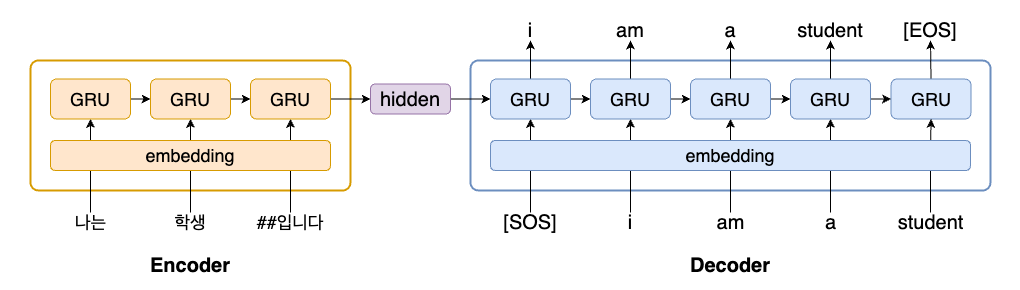

seq2seq Î™®Îç∏ÏùÄ ÌÅ¨Í≤å encoderÏôÄ decoderÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§. encoderÎäî ÏûÖÎ†• ÌÖçÏä§Ìä∏Î°úÎ∂ÄÌÑ∞ ÏùòÎØ∏Î•º Ï∂îÏ∂úÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§. Î®ºÏ†Ä ÏûÖÎ†• Î¨∏Ïû•ÏúºÎ°úÎ∂ÄÌÑ∞ ÏûÑÎ≤†Îî©ÏùÑ Ï∂îÏ∂úÌïòÍ≥†, GRUÎ•º ÌÜµÍ≥ºÌïòÏó¨ ÎßàÏßÄÎßâ Îã®Í≥ÑÏùò hidden stateÎ•º Ï∂îÏ∂úÌïòÏó¨ decoderÎ°ú ÎÑòÍ≤®Ï§çÎãàÎã§.

decoderÎäî ÏûÖÎ†• Î¨∏Ïû• Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÍ≥† Î≤àÏó≠ ÌÖçÏä§Ìä∏Î•º Ï∂úÎ†•ÌïòÎäî Ïó≠Ìï†ÏùÑ ÏàòÌñâÌï©ÎãàÎã§. encoderÎ°úÎ∂ÄÌÑ∞ Ï†ÑÎã¨Î∞õÏùÄ hidden stateÎ•º Ï¥àÍ∏∞Í∞íÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ GRUÏùÑ ÌÜµÍ≥ºÌï©ÎãàÎã§. Ïù¥ ÎñÑ, Î¨∏Ïû•Ïùò ÎÅùÏùÑ ÎÇòÌÉÄÎÇ¥Îäî [EOS] ÌÜ†ÌÅ∞Ïù¥ ÎÇòÏò¨ ÎïåÍπåÏßÄ Í≥ÑÏÜç Î∞òÎ≥µÌï¥Ï§çÎãàÎã§.


### teacher forcing

decoder Î∂ÄÎ∂ÑÏùÑ Î≥¥ÏãúÎ©¥ ÎùºÎ≤®Ïóê Ìï¥ÎãπÌïòÎäî Î≤àÏó≠ ÌÖçÏä§Ìä∏Í∞Ä ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî Î∂ÄÎ∂ÑÏù¥ Î≥¥ÏûÖÎãàÎã§. Ïù¥Îäî ÌïôÏäµÏùÑ Îçî Îπ†Î•¥Í≤å ÏßÑÌñâÏãúÌÇ§Í∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©ÌïòÎäî teacher forcing(ÍµêÏÇ¨ Í∞ïÏöî) Í∏∞Î≤ïÏûÖÎãàÎã§. Ïù¥Ï†Ñ ÏãúÏ†êÏóêÏÑúÏùò Ï∂úÎ†• Í∞íÏùÑ decoderÏóê Îã§Ïãú ÏûÖÎ†•ÏúºÎ°ú ÎÑ£ÏßÄ ÏïäÍ≥†, Ïã§Ï†ú ÎùºÎ≤® Í∞íÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÎäî Í≤ÉÏûÖÎãàÎã§.

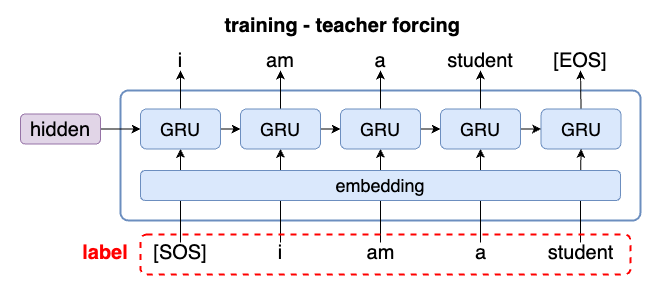

Ïù¥Î†áÍ≤å ÌïòÎäî Ïù¥Ïú†Îäî Î™®Îç∏Ïù¥ Ï†ÅÏ†àÌûà ÌïôÏäµÎêòÏßÄ ÏïäÏùÄ ÏÉÅÌÉúÏóêÏÑú Ïù¥Ï†Ñ ÏòàÏ∏° Í∞íÏùÑ Îã§Ïùå ÏÖÄÏùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎ©¥ Î™®Îç∏ ÌïôÏäµÏù¥ Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Ïù¥Ï†Ñ ÏãúÏ†êÏóê ÏûòÎ™ª ÏòàÏ∏°ÏùÑ ÌñàÎçîÎùºÎèÑ, Ïã§Ï†ú ÎùºÎ≤®ÏùÑ ÎÑ£Ïñ¥Ï§òÏÑú Îã§Ïùå ÏÖÄÏóêÏÑú Î™®Îç∏ ÌïôÏäµÏù¥ ÏùºÏñ¥ÎÇ† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏôÄÏ§çÎãàÎã§.

ÍµêÏÇ¨ Í∞ïÏöîÎ•º Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ÏÑú decoderÎ°ú ÎÑ£Ïñ¥Ï£ºÎäî Î≤àÏó≠Î¨∏ ÌÖçÏä§Ìä∏Ïùò Îß® ÏïûÏóê Î¨∏Ïû•Ïùò ÏãúÏûëÏùÑ ÏùòÎØ∏ÌïòÎäî [SOS] ÌÜ†ÌÅ∞ÏùÑ ÎÑ£Ïñ¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

## Dataset, DataLoader


Î≥ëÎ†¨ ÏΩîÌçºÏä§Ïóê ÎßûÎäî datasetÍ≥º dataloaderÎ•º ÏûëÏÑ±Ìï¥Ï§çÎãàÎã§. Ïù¥ Îïå, collate_fnÏóêÏÑú pack_padded_sequence ÏãúÏóê ÏÇ¨Ïö©Ìï† Î¨∏Ïû•Î≥Ñ ÌÜ†ÌÅ∞ Í∏∏Ïù¥ÎèÑ Î¶¨ÌÑ¥Ìï¥Ï£ºÎèÑÎ°ù Ìï©ÎãàÎã§. Í∑∏Î¶¨Í≥† teacher forcing Íµ¨ÌòÑÏóê ÌïÑÏöîÌïòÎØÄÎ°ú, Î≤àÏó≠Î¨∏ ÌÖçÏä§Ìä∏ÏóêÎäî Îß® ÏïûÏóê [SOS] ÌÜ†ÌÅ∞ÏùÑ Î∂ôÏó¨Ï£ºÍ≤†ÏäµÎãàÎã§.

### Dataset

In [11]:
from torch.utils.data import Dataset

class CustomTextDataset(Dataset):
    def __init__(self, corpus_df):
        self.corpus_df = corpus_df

    def __len__(self):
        return len(self.corpus_df)

    def __getitem__(self, idx):
        row = self.corpus_df.iloc[idx]
        src = row["kor"]
        tar = row["eng"]
        return src, tar

In [12]:
train_dataset = CustomTextDataset(train_df)
val_dataset = CustomTextDataset(val_df)
test_dataset = CustomTextDataset(test_df)

In [13]:
train_dataset[0]

('msleeÍ∞Ä Î∂ÄÏû¨Ï§ëÏù¥ÏÖîÏÑú, ÎãπÏã†ÏóêÍ≤å Ïó∞ÎùΩÎìúÎ¶ΩÎãàÎã§.', 'since ms.lee is absence, i contacted you.')

### DataLoader

Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎäî Îç∞Ïù¥ÌÑ∞ ÏÖãÏúºÎ°úÎ∂ÄÌÑ∞ ÌïúÍµ≠Ïñ¥ÏôÄ ÏòÅÏñ¥ Î¨∏Ïû•ÏùÑ Í∞ÄÏ†∏ÏôÄÏÑú, Ï¥ù 3Í∞ÄÏßÄ ÌÖêÏÑúÎ•º Î¶¨ÌÑ¥Ìï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.
- src_padded: encoderÏóê ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞à ÌïúÍµ≠Ïñ¥ Î¨∏Ïû• ÌÖêÏÑú
- tar_in_padded: teacher forcingÏùÑ ÏúÑÌï¥ decoderÏóê ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞à ÏòÅÏñ¥ Î¨∏Ïû• ÌÖêÏÑú
- tar_out_padded: decoderÍ∞Ä Ï†úÎåÄÎ°ú Î≤àÏó≠ÏùÑ ÏàòÌñâÌñàÎäîÏßÄ ÎπÑÍµêÌï† ÏòÅÏñ¥ Î¨∏Ïû• ÌÖêÏÑú

Î®ºÏ†Ä Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÎäî ÏûëÏóÖÎ∂ÄÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [26]:
import torch

MAX_TOKENS = 256
BATCH_SIZE = 256

In [27]:
vocabs = kor_tokenizer.get_vocab()
pad_token = vocabs["[PAD]"]
sos_token = vocabs["[SOS]"]
eos_token = vocabs["[EOS]"]

In [28]:
def tokenize(text, is_korean=True):
    if is_korean:
        tokens = kor_tokenizer.encode(text).ids
    else:
        tokens = eng_tokenizer.encode(text).ids
    tokens = tokens[:MAX_TOKENS]
    token_tensor = torch.tensor(tokens, dtype=torch.long)
    return token_tensor

In [29]:
tokens = tokenize("[SOS]i am a student", is_korean=False)
print(tokens)

tensor([   2,   27,  233,   19, 1412])


In [30]:
tokens = tokenize("i am a student[EOS]", is_korean=False)
print(tokens)

tensor([  27,  233,   19, 1412,    3])


collate_fnÏóêÏÑú Ìï¥ÏïºÌï† ÏùºÏùÄ ÌÅ¨Í≤å 3Í∞ÄÏßÄÏûÖÎãàÎã§.
- ÏõêÎ¨∏ ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞Ìôî ÌïòÍ≥† Ìå®Îî© Ï±ÑÏö∞Í∏∞
- Î≤àÏó≠Î¨∏ ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞ÌôîÌïòÍ≥†, decoder inputÏïûÏóê [SOS] ÌÜ†ÌÅ∞, decoder output Îí§Ïóê [EOS] ÌÜ†ÌÅ∞ Î∂ôÏó¨Ï£ºÍ∏∞
- Í∞ÅÍ∞Å ÌÜ†ÌÅ∞ Í∞úÏàò ÏÑ∏ÏÑú Í∞ôÏù¥ Î¶¨ÌÑ¥Ìï¥Ï£ºÍ∏∞

In [80]:
from torch.nn.utils.rnn import pad_sequence


def collate_fn(batch):
    src = [x[0] for x in batch]
    tar = [x[1] for x in batch]

    # 1. ÌÜ†ÌÅ∞Ìôî ÌïòÍ∏∞, tar_inÍ≥º tar_outÏóêÎäî Í∞ÅÍ∞Å [SOS], [EOS] Ï∂îÍ∞Ä
    src_tokens = [tokenize(x, is_korean=True) for x in src]
    tar_in_tokens = [tokenize(f"[SOS]{x}", is_korean=False) for x in tar]
    tar_out_tokens = [tokenize(f"{x}[EOS]", is_korean=False) for x in tar]

    # 2. padding Ï±ÑÏö∞Í∏∞
    src_padded = pad_sequence(src_tokens).to(device)
    tar_in_padded = pad_sequence(tar_in_tokens).to(device)
    tar_out_padded = pad_sequence(tar_out_tokens).to(device)

    # 3. token Í∞úÏàò ÏÑ∏Í∏∞
    src_lengths = [len(x) for x in src_tokens]
    tar_lengths = [len(x) for x in tar_in_tokens]
    return src_padded, tar_in_padded, tar_out_padded, src_lengths, tar_lengths

In [81]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)

In [82]:
train_iterator = iter(train_dataloader)
batch = next(train_iterator)
src_padded, tar_in_padded, tar_out_padded, src_lengths, tar_lengths  = batch

In [83]:
tar_in_padded

tensor([[  2,   2,   2,  ...,   2,   2,   2],
        [554,  27, 238,  ..., 151, 124,  27],
        [ 97,   5,  87,  ..., 109, 280, 539],
        ...,
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0]], device='cuda:0')

In [84]:
tar_out_padded

tensor([[ 554,   27,  238,  ...,  151,  124,   27],
        [  97,    5,   87,  ...,  109,  280,  539],
        [ 128,   31, 1645,  ...,   87,  209,  209],
        ...,
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0]], device='cuda:0')

## Encoder ÏûëÏÑ±ÌïòÍ∏∞

Î®ºÏ†Ä encoderÎ•º Íµ¨ÌòÑÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. Ïù¥Îäî ÌïúÍµ≠Ïñ¥ Î¨∏Ïû• ÌÜ†ÌÅ∞ÏùÑ Ï†ÑÎã¨Î∞õÏïÑÏÑú ÏûÑÎ≤†Îî©ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§. Í∑∏ Îã§Ïùå ÎßàÏßÄÎßâ hidden stateÎ•º Î¶¨ÌÑ¥Ìï©ÎãàÎã§. Îã§Ïù¥Ïñ¥Í∑∏Îû®ÏóêÎäî GRU Ï∏µÏù¥ ÌïòÎÇòÎ°ú ÌëúÏãúÎêòÏóàÏßÄÎßå, Ïã§Ï†úÎ°úÎäî N_LAYER Í∞í ÎßåÌÅº LSTM Ï∏µÏù¥ ÏåìÏó¨ÏûàÏäµÎãàÎã§.

Í∑∏Î¶¨Í≥† encoderÏùò Í≤ΩÏö∞ bi-directional ÏòµÏÖòÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§. Îã§Îßå, decoderÏùò Í≤ΩÏö∞Ïóî bi-directional ÏÇ¨Ïö©Ïù¥ Î∂àÍ∞ÄÌï¥, decoderÏóê hidden stateÎ•º ÎÑòÍ≤®Ï£ºÍ∏∞ Ï†ÑÏóê linear layerÎ•º ÌïúÎ≤à ÌÜµÍ≥ºÏãúÏºúÏ£ºÏñ¥ Ï∞®ÏõêÏùÑ ÎßûÏ∂∞Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

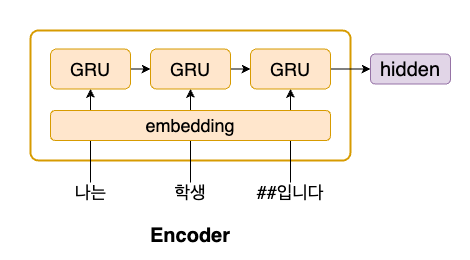

### Encoder ÌÅ¥ÎûòÏä§ Íµ¨ÌòÑ

In [85]:
import torch.nn as nn

VOCAB_SIZE = 8000
EMBEDDING_DIM = 256
HIDDEN_UNITS = 256
EMBED_MAX_NORM = 1
NUM_LAYERS = 1
DROPOUT = 0.5
BIDIRECTIONAL = True

In [94]:
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence

class Encoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, bidirectional):
        super(Encoder, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embedding_dim
        )
        self.rnn = nn.GRU(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            bidirectional=bidirectional,
            dropout=0.5,
        )
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim * 2, hidden_dim)

    def forward(self, x, lengths):
        embedded = self.dropout(self.embedding(x))
        packed_embedded = pack_padded_sequence(embedded, lengths, enforce_sorted=False)
        padded_outputs, hidden = self.rnn(packed_embedded)
        if self.rnn.bidirectional:
            hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)))
            hidden = hidden.unsqueeze(0)
        return hidden

In [95]:
encoder = Encoder(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_UNITS,
    num_layers=NUM_LAYERS,
    bidirectional=BIDIRECTIONAL
).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [96]:
src_padded.shape, len(src_lengths)

(torch.Size([38, 256]), 256)

In [97]:
!pip install torchinfo

In [98]:
from torchinfo import summary

summary(encoder)

Layer (type:depth-idx)                   Param #
Encoder                                  --
‚îú‚îÄEmbedding: 1-1                         2,048,000
‚îú‚îÄGRU: 1-2                               789,504
‚îú‚îÄDropout: 1-3                           --
‚îú‚îÄLinear: 1-4                            131,328
Total params: 2,968,832
Trainable params: 2,968,832
Non-trainable params: 0

In [99]:
encoder

Encoder(
  (embedding): Embedding(8000, 256)
  (rnn): GRU(256, 256, dropout=0.5, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=256, bias=True)
)

### Encoder ÎèôÏûë ÌôïÏù∏

Î∞∞Ïπò ÌïòÎÇòÎßå ÌùòÎ†§Î≥¥ÎÇ¥ÏÑú encoderÍ∞Ä Ï†úÎåÄÎ°ú hidden stateÏôÄ cell stateÎ•º Î¶¨ÌÑ¥Ìï¥Ï£ºÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [100]:
hidden = encoder(src_padded, src_lengths)

In [101]:
hidden.shape

torch.Size([1, 256, 256])

## Decoder ÏûëÏÑ±ÌïòÍ∏∞
encoderÎ°úÎ∂ÄÌÑ∞ ÏãúÏûë hidden stateÎ•º Ï†ÑÎã¨Î∞õÏäµÎãàÎã§. embedding, GRU Íµ¨Ï°∞Îäî encoderÏôÄ ÎèôÏùºÌï©ÎãàÎã§.

GRUÏùò Í∞Å Ïä§ÌÖùÎ≥Ñ outputÏùÑ Fully Connected LayerÎ•º ÌïúÎ≤à ÌÜµÍ≥ºÏãúÏºú ÏòàÏ∏° ÌÜ†ÌÅ∞ Í∞íÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§. ÎÇòÏ§ëÏóê Ïù¥ Í∞íÎì§Ïóê softmaxÎ•º Ï†ÅÏö©Ìïú Îí§, Ïã§Ï†ú ÎùºÎ≤®Í≥º ÎπÑÍµêÌïòÏó¨ cross entropy lossÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≤å Îê©ÎãàÎã§.

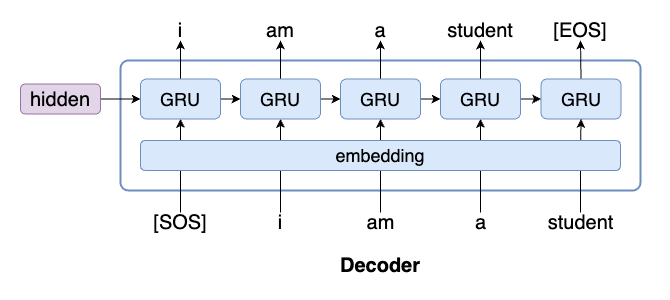

### Decoder ÌÅ¥ÎûòÏä§ Íµ¨ÌòÑ

decoderÏùò Í≤ΩÏö∞, bidirectional=FalseÎ°ú ÏÑ§Ï†ïÌï¥Ï£ºÏñ¥ÏïºÎßå Ìï©ÎãàÎã§. ÏôúÎÉêÌïòÎ©¥ Î≤àÏó≠Ìï† Î¨∏Ïû•ÏùÑ Î™®Î•¥Îäî ÏÉÅÌÉúÏóêÏÑú Ïó≠ÏàúÏúºÎ°ú hidden state Í∞íÏùÑ ÌùòÎ¶¥ Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

In [102]:
from torch.nn.utils.rnn import pad_packed_sequence


class Decoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            dropout=0.5,
        )
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x, lengths, hidden):
        embedded = self.dropout(self.embedding(x))
        packed_embedded = pack_padded_sequence(embedded, lengths, enforce_sorted=False)

        # rnn Ìò∏Ï∂ú ÏãúÏóê encoderÎ°úÎ∂ÄÌÑ∞ Ï†ÑÎã¨Î∞õÏùÄ hidden, cellÏùÑ ÎÑ£Ïñ¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
        packed_output, hidden = self.rnn(packed_embedded, hidden)
        outputs, output_lengths = pad_packed_sequence(packed_output)
        prediction = self.dropout(self.fc(outputs))
        return prediction, hidden

In [103]:
decoder = Decoder(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_UNITS,
    num_layers=NUM_LAYERS,
).to(device)

In [104]:
decoder

Decoder(
  (embedding): Embedding(8000, 256)
  (rnn): GRU(256, 256, dropout=0.5)
  (fc): Linear(in_features=256, out_features=8000, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [105]:
summary(decoder)

Layer (type:depth-idx)                   Param #
Decoder                                  --
‚îú‚îÄEmbedding: 1-1                         2,048,000
‚îú‚îÄGRU: 1-2                               394,752
‚îú‚îÄLinear: 1-3                            2,056,000
‚îú‚îÄDropout: 1-4                           --
Total params: 4,498,752
Trainable params: 4,498,752
Non-trainable params: 0

### Decoder ÎèôÏûë ÌôïÏù∏

Î∞∞Ïπò ÌïòÎÇòÎßå ÌùòÎ†§Î≥¥ÎÇ¥ÏÑú encoderÍ∞Ä Ï†úÎåÄÎ°ú hidden stateÏôÄ cell stateÎ•º Î¶¨ÌÑ¥Ìï¥Ï£ºÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [106]:
prediction, hidden = decoder(tar_in_padded, tar_lengths, hidden)

In [107]:
prediction.shape, hidden.shape

(torch.Size([39, 256, 8000]), torch.Size([1, 256, 256]))

## Seq2Seq ÏûëÏÑ±ÌïòÍ∏∞

ÏïûÏÑú ÏûëÏÑ±Ìïú encoderÏôÄ decoderÎ•º Ï†ÑÎã¨Î∞õÏïÑÏÑú seq2seq Î°úÏßÅÏùÑ Ï≤òÎ¶¨ÌïòÎäî ÌÅ¥ÎûòÏä§ ÏûëÏÑ±Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

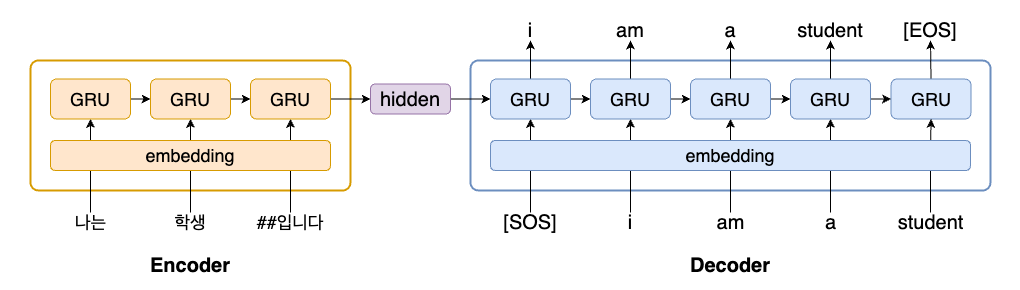

### Seq2Seq ÌÅ¥ÎûòÏä§ Íµ¨ÌòÑ

In [108]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src_padded, src_lengths, tar_in_padded, tar_lengths):
        hidden = self.encoder(src_padded, src_lengths)
        prediction, hidden = self.decoder(tar_in_padded, tar_lengths, hidden)
        return prediction

In [109]:
model = Seq2Seq(encoder, decoder)

### Seq2Seq ÎèôÏûë ÌôïÏù∏

In [110]:
prediction = model(src_padded, src_lengths, tar_in_padded, tar_lengths)

In [111]:
prediction.shape

torch.Size([39, 256, 8000])

## inference

Î™®Îç∏Ïù¥ Î≤àÏó≠ÏùÑ Ï†úÎåÄÎ°ú ÏàòÌñâÌïòÎäîÏßÄ Ï§ëÍ∞Ñ Ï§ëÍ∞ÑÏóê ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú ÏΩîÎìúÏûÖÎãàÎã§. teacher forcingÏùÑ Ï†ÅÏö©ÌïòÏßÄ ÏïäÍ≥†, Ïù¥Ï†Ñ ÏãúÏ†êÏóê ÏòàÏ∏° Í≤∞Í≥ºÎ°ú ÎÇòÏò® ÌÜ†ÌÅ∞ÏùÑ Îã§Ïùå ÏãúÏ†ê ÏûÖÎ†•ÏúºÎ°ú Ï†ÑÎã¨Ìï©ÎãàÎã§. Ïù¥Îü¨Ìïú Î∞©ÏãùÏùÑ greedy decodingÏù¥ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.

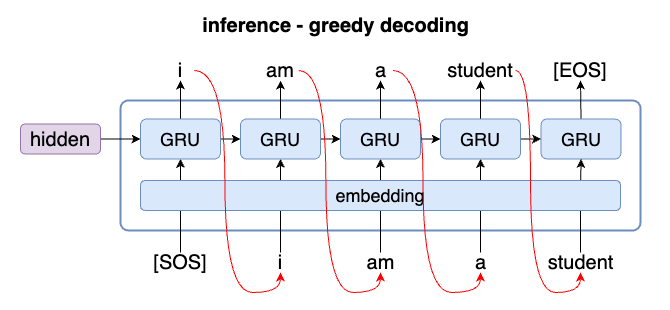

### Greedy Decoding

Î®ºÏ†Ä greedy decodingÏùÑ ÏàòÌñâÌïòÎäî Ìï®ÏàòÎ∂ÄÌÑ∞ ÏûëÏÑ±Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. ÌÖêÏÑú Ïó∞ÏÇ∞Ïù¥ ÏÉÅÎãπÌûà Î≥µÏû°Ìï©ÎãàÎã§Îßå, Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Îã§Ïùå ÏãúÏ†êÏóê ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§Îäî Í≤ÉÎßå Í∏∞ÏñµÌïòÏãúÍ≥† ÎÑòÏñ¥Í∞ÄÏãúÎ©¥ Îê©ÎãàÎã§.

In [120]:
MAX_SEQUENCE_LENGTH = 30

def greedy_decoding(model, sentence):
    model.eval()
    tokens = tokenize(sentence, is_korean=True)
    src_in = tokens.unsqueeze(-1).to(device)
    src_lengths = [len(tokens)]
    tar_in = torch.tensor([[sos_token]], dtype=torch.long).to(device)
    tar_lengths = [1]

    with torch.no_grad():
        hidden = model.encoder(src_in, src_lengths)
        results = []
        for i in range(MAX_SEQUENCE_LENGTH):
            prediction, hidden = model.decoder(tar_in, tar_lengths, hidden)
            # sequence length, batch size Î™®Îëê 1Ïù¥ÎØÄÎ°ú ÏùòÎØ∏ ÏóÜÎäî Ï∞®Ïõê Ï†úÍ±∞
            prediction = prediction.squeeze()
            # top1 ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• Î∞è EOS ÌÜ†ÌÅ∞Ïùº Í≤ΩÏö∞ Ïù∏ÌçºÎü∞Ïä§ Ï§ëÏßÄ
            top1 = prediction.argmax()
            results.append(top1.item())
            if top1 == eos_token:
                break
            # Ïù¥Ï†Ñ ÏãúÏ†êÏùò Ï∂úÎ†•Í∞íÏùÑ Îã§Ïùå ÏãúÏ†êÏùò ÏûÖÎ†• Í∞íÏúºÎ°ú ÏÇ¨Ïö©
            tar_in = torch.tensor([[top1]], dtype=torch.long).to(device)
    translated = eng_tokenizer.decode(results)
    return translated

### inference ÎèôÏûë ÌôïÏù∏

greedy decodingÏù¥ Ï†úÎåÄÎ°ú ÎèôÏûëÌïòÎäîÏßÄ ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏÖãÏúºÎ°ú ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÏßÄ ÏïäÏïòÍ∏∞ ÎïåÎ¨∏Ïóê Î≤àÏó≠ÏùÑ Ï†úÎåÄÎ°ú ÏàòÌñâÌïòÏßÄ Î™ªÌï©ÎãàÎã§.

In [125]:
def inference_samples(model, samples):
    for kor, eng in samples.values:
        translated = greedy_decoding(model, kor)
        print("kor:", kor)
        print("eng:", eng)
        print("translated:", translated)
        print("===========================================\n")

In [127]:
samples = test_df[:5]
inference_samples(model, samples)

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: union automatic baek 120 clin ##iest plays responsible ##rim near sadness se ang ##wer designated ##here threw examine transactions mo decl ##li volley two humid gim mom ##cc ##gan ##ac

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: ##gers ##ghter ey contem complaints spin necessary treat ##00 ##very ##very ##gg neckl ##abled paul 16th ##come physically revision ##nam pulled fin sl barbe dess vel socks current ash buck

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: ring ##e

## ÌïôÏäµÏãúÌÇ§Í∏∞
Ïù¥Ï†ú Ï§ÄÎπÑÎäî ÎÅùÎÇ¨ÏäµÎãàÎã§. seq2seq ÌïúÍµ≠Ïñ¥ ÏòÅÏñ¥ Î≤àÏó≠ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºú Î≥¥Í≤†ÏäµÎãàÎã§. üöÄüöÄ


### train, validate

In [112]:
def get_mean(metrics):
    return round(sum(metrics) / len(metrics), 4)

In [115]:
from collections import defaultdict
import numpy as np
from tqdm.notebook import tqdm

from torchtext.data.metrics import bleu_score


def train_model(model, epoch):
    model.train()
    loss_list = []

    pbar = tqdm(total=len(train_dataloader), position=0, leave=True)
    for data in train_dataloader:
        src_padded, tar_in_padded, tar_out_padded, src_lengths, tar_lengths = data
        outputs = model(src_padded, src_lengths, tar_in_padded, tar_lengths)
        probs = outputs.view(-1, outputs.shape[-1])
        labels = tar_out_padded.view(-1)

        loss = criterion(probs, labels)
        loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()

        # gradient Ìè≠Î∞úÏùÑ ÎßâÏïÑÏ£ºÎäî Ïû•Ïπò
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()

        pred = torch.argmax(probs, dim=1)
        pbar.set_description(f"[Epoch {epoch}] TRAIN loss: {round(loss.item(), 4)}")
        pbar.update()
    return get_mean(loss_list)

In [116]:
def validate_model(model, epoch):
    model.eval()
    loss_list = []

    pbar = tqdm(total=len(val_dataloader), position=0, leave=True)
    for data in val_dataloader:
        src_padded, tar_in_padded, tar_out_padded, src_lengths, tar_lengths = data

        with torch.no_grad():
            outputs = model(src_padded, src_lengths, tar_in_padded, tar_lengths)
            probs = outputs.view(-1, outputs.shape[-1])
            labels = tar_out_padded.view(-1)

            loss = criterion(probs, labels)
            loss_list.append(loss.item())

        pbar.set_description(f"[Epoch {epoch}] VAL loss: {round(loss.item(), 4)}")
        pbar.update()
    return get_mean(loss_list)

In [133]:
from collections import defaultdict


def train_validate_model(model):
    logs = defaultdict(list)
    for epoch in range(epochs):
        train_loss = train_model(model, epoch+1)
        val_loss = validate_model(model, epoch+1)
        inference_samples(model, samples)
        logs["train_loss"].append(train_loss)
        logs["val_loss"].append(val_loss)
    return logs

In [134]:
from matplotlib import pyplot as plt

def plot_logs(logs):
    plt.plot(logs["train_loss"], label="train")
    plt.plot(logs["val_loss"], label="val")
    plt.legend()
    plt.set_title("loss")

### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÖãÌåÖ

In [135]:
criterion = nn.CrossEntropyLoss(ignore_index=pad_token)
epochs = 10
learning_rate = 0.001

### ÌïôÏäµ Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [136]:
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? i ' m really sorry , but i ' m really sure that you can ' t have any time ?

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: why are you going to do this time , and why are you going to be a good idea ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we couldn ' t have a car in the morning , but we can ' t go to the station .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.


  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? i ' m really sorry . i ' m looking forward to the product .

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: why are you going to be a good relationship with our family ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we have to go to the airport to the airport , but we can ' t go to the airport .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: i can ' t eat th

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? how much is it ? i ' m really sorry for you .

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: if we were all the same year , why are you going to be a new person ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we ' ve been able to go to the airport , but we can ' t find it at the airport .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: the best is the most p

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? i ' m really glad to eat a lot of time .

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: why are you going to be a person who lives in our lives ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we booked a parking lot of luggage , but we can ' t find it at the airport .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: there is a place where you can enjoy the ko

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? it ' s really good . what ' s the time you really liked ?

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: why is it true if we have a dream of our life ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we ' ve been here to go to the airport , so we can ' t find it at the airport .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: it is a place where you can enjoy

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? it ' s really good . what should i do ?

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: if we were in our life , why don ' t we have a dream of our life ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we ' re going to find a flight attendant , so we can ' t find it at the airport .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: it is a place where you can en

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? it ' s really good . how long it was really delicious ?

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: if we are all of our dreams , why do you have a dream to be a dream ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we ' re going to find a bus to find the airport to get to the airport to get to the airport .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated:

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? thank you for your good time ?

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: why do you want to be a good person in our life ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we ' re going to go to the airport to find a place where we can find the airport where we can find it .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: it is the best food in korea .

ko

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? how much did you enjoy it ?

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: why do you have a dream to do if we have a dream of all the time ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we only have to wait for a pickup service for a long time to get to the airport .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: it is a korean restaurant where you can en

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/387 [00:00<?, ?it/s]

kor: Ï†ïÎßê? Í∑∏ÎûòÏÑú Ï¢ãÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎãà? ÎßõÏûàÎäî Í≤ÉÎèÑ ÎßéÏù¥ Î®πÏóàÎãà?
eng: really? so did you have a good time? did you eat delicious food?
translated: really ? how long did you enjoy it ?

kor: ÎßåÏïΩ Ïö∞Î¶¨Ïùò Ïù∏ÏÉùÏù¥ ÌïúÎÇ± ÍøàÏóê Î∂àÍ≥ºÌïòÎã§Î©¥, Ïôú Ïö∞Î¶¨Îäî Î™®Îëê Ïù¥Î†áÍ≤å ÏöïÏã¨Ïù¥ ÎßéÏùÑÍπåÏöî?
eng: if our life is but a dream, why do we have an itchy palm like this?
translated: why do you think we ' re going to be a dream of our dream if we have a dream of this challenge ?

kor: Ïö∞Î¶¨Îäî Í≥µÌï≠ÏóêÏÑúÎßå Î¨¥Î£å ÏôÄÏù¥ÌååÏù¥Î•º Ïì∏ Ïàò ÏûàÏñ¥ÏÑú Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§ Í∞ÄÎäî Í∏∏ÏùÑ ÎØ∏Î¶¨ Ï∞æÏïÑÎÜ®Ïñ¥Ïöî.
eng: as we could only use free wifi at the airport, we searched the way to our guesthouse in advance.
translated: we came to the airport to use the airport to get to the airport , so we can use it .

kor: Í∑∏Í≥≥Ïóê ÌïúÍµ≠ÏóêÏÑú Î∂ÑÏ∞®Î•º Í∞ÄÏû• ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎäî Í≥≥ÏûÖÎãàÎã§.
eng: the place where we can enjoy the bun cha the most.
translated: it is a p

AttributeError: ignored

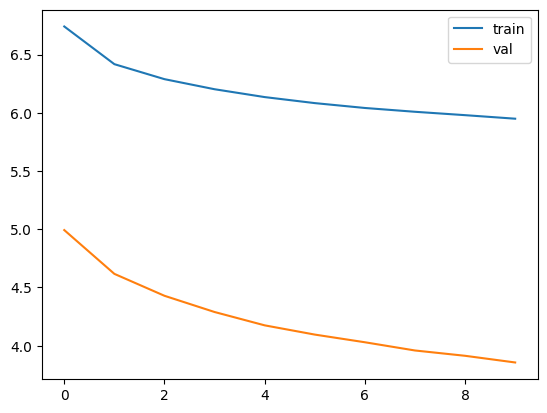

In [137]:
logs = train_validate_model(model)
plot_logs(logs)

## ÌÖåÏä§Ìä∏ Î∞è Ï†ÄÏû•

### Î¨∏Ïû• Î≤àÏó≠Ìï¥Î≥¥Í∏∞

ÌïôÏäµÎêú Î™®Îç∏Ïóê ÏûÑÏùòÏùò Î¨∏Ïû•ÏùÑ ÎÑ£Ïñ¥ÏÑú Ï†úÎåÄÎ°ú Î≤àÏó≠ÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Íµ¨Ï≤¥Ï†ÅÏù∏ Î≤àÏó≠ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÎäî Îã§Ïùå Ï±ïÌÑ∞ÏóêÏÑú ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.

In [142]:
greedy_decoding(model, "Î∞∞ÎèÑ Í≥†ÌîàÎç∞ Ï†ÄÎûë Í∞ôÏù¥ Ï†êÏã¨ Î®πÏùÑÎûòÏöî?")

"i ' m hungry , so can i eat lunch together ?"

### Î™®Îç∏ Ï†ÄÏû•

In [143]:
savepath = "./drive/MyDrive/dscamp_2023/translation_weight.pth"
torch.save(model.state_dict(), savepath)

## Ï†ïÎ¶¨

Ïù¥Î≤à ÏãúÍ∞ÑÏóêÎäî Í∏∞Í≥Ñ Î≤àÏó≠ Î∂ÑÏïºÏóêÏÑú ÌòÅÏã†ÏùÑ ÏùºÏúºÌÇ® seq2seq Î™®Îç∏Ïóê ÎåÄÌï¥ÏÑú Î∞∞ÏõåÎ≥¥ÏïòÏäµÎãàÎã§. Ïù¥ Î™®Îç∏ÏùÑ Í∏∞Ï†êÏúºÎ°ú Îî•Îü¨ÎãùÏùÑ Ïù¥Ïö©Ìïú ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨Í∞Ä Í∏âÏÜçÎèÑÎ°ú Î∞úÏ†ÑÌïòÍ≤å ÎêòÎ©∞, Ïù¥ÌõÑÏóê Îì±Ïû•ÌïòÎäî Attention Í∞úÎÖêÏùò Ï¥àÏÑùÏù¥ Îê©ÎãàÎã§.

Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Îäî ÏΩîÎìúÏùò Íµ¨Ï°∞Îäî ÏÉÅÎãπÌûà Î≥µÏû°ÌïòÏßÄÎßå, Î™®Îç∏ Íµ¨Ï°∞Îäî Îß§Ïö∞ Îã®ÏàúÌïòÏòÄÏäµÎãàÎã§. ÎÑàÎ¨¥ ÎîîÌÖåÏùºÏóê ÏßëÏ∞©ÌïòÏßÄ ÎßêÍ≥†, encoderÏôÄ decoderÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Ï†ÑÎ∞òÏ†ÅÏù∏ Íµ¨Ï°∞Îßå Ïù¥Ìï¥ÌïòÍ≥† ÎÑòÏñ¥Í∞ÄÍ≤†ÏäµÎãàÎã§.